In [1]:
import os
import zipfile

In [2]:
cabbage_dir = os.path.join('/home/babyhack/Documents/Project/model/Project/pro/pro-test/cabbage')
carrot_dir = os.path.join('/home/babyhack/Documents/Project/model/Project/pro/pro-test/carrot')
maize_dir = os.path.join('/home/babyhack/Documents/Project/model/Project/pro/pro-test/maize')

print('total training cabbage images:', len(os.listdir(cabbage_dir)))
print('total training carrot images:', len(os.listdir(carrot_dir)))
print('total training maize images:', len(os.listdir(maize_dir)))

total training cabbage images: 7
total training carrot images: 7
total training maize images: 8


In [3]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

# pic_index = 2

# next_cabbage = [os.path.join(cabbage_dir, fname) 
#                 for fname in cabbage_files[pic_index-2:pic_index]]
# carrot_paper = [os.path.join(carrot_dir, fname) 
#                 for fname in carrot_files[pic_index-2:pic_index]]
# next_scissors = [os.path.join(maize_dir, fname) 
#                 for fname in maize_files[pic_index-2:pic_index]]

# for i, img_path in enumerate(next_rock+next_paper+next_scissors):
#   #print(img_path)
#   img = mpimg.imread(img_path)
#   plt.imshow(img)
#   plt.axis('Off')
#   plt.show()

In [4]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/home/babyhack/Documents/Project/model/Project/pro/pro-test"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
print(training_datagen);

In [5]:
VALIDATION_DIR = "/home/babyhack/Documents/Project/model/Project/pro/pro-val -set"
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [6]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 22 images belonging to 3 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

Found 6 images belonging to 3 classes.


In [8]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Epoch 1/25
20/20 [==============================] - 52s 829ms/step - loss: 1.1046 - accuracy: 0.3182 - val_loss: 1.3774 - val_accuracy: 0.3333


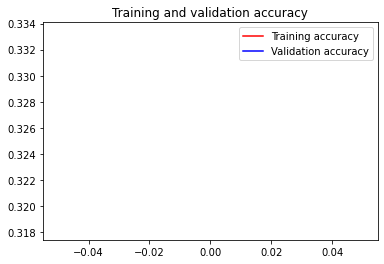

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [11]:
import numpy as np
from keras.preprocessing import image

uploaded ="/home/babyhack/Documents/Project/model/Project/IMG_20210318_135619.jpg"

for fn in uploaded:
 
  # predicting images
    path = uploaded
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
#     print(fn)
    print(classes)

[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
[[1. 0. 0.]]
